# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le chiffre d'affaire d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le chiffre d'affaire (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [156]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
# data = data.astype(int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le chiffre d'affaires (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [157]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];

Text(0, 0.5, "Chiffre d'affaires x1000")

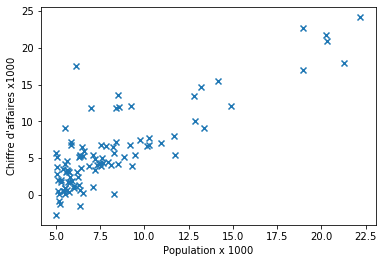

In [158]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [159]:
def computeCostNonVect(X, y, theta):
    # To calculate the cost we have to the response of the model for each data point with the given theta values and
    # the sum of the squared differences (Squared Residuals) that will be used later on to compute the cost:
    # Model function : F(X) = theta_0 + theta_1 * X.
    # Sum of Squared differences : sum (theta_0 + theta_1*Xi - Yi) ** 2 where i = 1 ... m.
    
    f_x = np.array([], dtype=float) # An array which is going to contain the responses of the model.
    j_theta = 0 # This variable is used to store the cost of the model.

    # To cycle through the data points and calculate the responses of the model.
    for i in range(0, X.shape[0]):
        response = theta[0] + X[i,1] * theta[1] # F(X) = theta_0 + theta_1 * X.
        # To save all of the responses of the model with current theta values, it will be used later on to compute the gradient of the cost function.
        f_x = np.append(f_x,response) 
        # the sum of the squared differences (Residuals).
        j_theta = j_theta + (response - y[i]) ** 2

    j_theta = j_theta / (2 * f_x.shape[0]) # The cost of the model with the current theta values.
    
    return j_theta , f_x # Return the cost and the responses of the model which will be used later on to calculate the gradient of the cost function.



In [160]:

def computeCost(X, y, theta):
    # To calculate the response of the model for each data point with the given theta values:
    # F(X) = theta_0 + theta_1 * X which can be calculated using the product of X and theta traspose and then sum up the two columns of the product.
    f_x = np.sum(theta.transpose() * X, axis=1) # First we have to calculate the product of the theta transpose and X, then sum up the two columns of the product to get all of the model's responses  at once.
    
    # To calculate the cost of the model with the given theta values : 
    # J(theta) = (1/2m) * sum (theta_0 + theta_1*Xi - Yi) ** 2 where i = 1 ... m.
    j_theta = np.sum((f_x - y) ** 2) / (2 * f_x.shape[0])
    
    return j_theta , f_x # Return the cost and the responses of the model which will be used later on to calculate the gradient of the cost function.

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [161]:
def costGradient(X,y,f_x):
    # This function is used to calculate the calculate the partial derivatives of the cost function (gradient with respect to theta_0 and theta_1).
    # Theta_0 gradient = (1/m) * sum(F(Xi)-Yi) where m is the number of examples and i = 1 ... m.
    # Theta_1 gradient = (1/m) * sum((F(Xi)-Yi) * Xi) where m is the number of examples and i = 1 ... m.
    diff = f_x - y # F(Xi)-Yi => model_responses - target_values : the errors of the model (residuals).
    
    # Cost Gradient with respect to theta_0:
    gTheta_0 = np.sum(diff) / X.shape[0] # Theta_0 gradient = (1/m) * sum(F(Xi)-Yi)
    
    # Cost Gradient with respect to theta_0:
    temp = np.array([diff[i] * X[i,1] for i in range(0,X.shape[0])], dtype=float) # (F(Xi)-Yi) * Xi.
    gTheta_1 = np.sum(temp) / X.shape[0] # Theta_1 gradient = (1/m) * sum((F(Xi)-Yi) * Xi).

    return (gTheta_0, gTheta_1) # Return the cost gradient which will be used to optimize the theta values.


def gradientDescent(X, y, theta, alpha, iterations):
    # The gradient descent is used to optimize theta values (model parameters "intercept and slope").
    
    costs = np.array([]) # An array which is going to be used to contain the costs.
    theta0 = np.array([]) # An array which is going to be used to contain theta0 values.
    theta1 = np.array([]) # An array which is going to be used to contain theta1 values.

    # To repeat the steps of gradient descent algorithm until we reach the maximum number of iterations or ....
    for i in range(0,iterations):
        # To compute the cost and the responses of the model with the current theta values.
        cost, f_x =computeCost(X, y, theta)
        # To save the cost of the current model with its parameters (theta0 and theta1).
        costs = np.append(costs,cost)
        theta0 = np.append(theta0,theta[0])
        theta1 = np.append(theta1,theta[1])
        # To calculate the gradient of the cost function with of the current model.
        cost_gradient = costGradient(X,y,f_x)
        # To calculate the new theta values ( optimized parameters ).
        theta[0] = theta[0] - alpha * cost_gradient[0]
        theta[1] = theta[1] - alpha * cost_gradient[1]
    costs=np.column_stack((theta0,theta1,costs)) # To stack the costs and theta values alongside in one array.
    return (theta, costs) # To return the parameters of the model which fits better the dataset and the costs of the different models.


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [162]:
theta = np.zeros((2, 1),dtype=float)

Calculer le cout initial

In [163]:
initialCost, f_x=computeCost(X, y, theta)
initialCost

32.072733877455676

Appel des la fonction de calcul du gradient

In [164]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta, costs = gradientDescent(X, y, theta, alpha, iterations);
theta

array([[-3.63029144],
       [ 1.16636235]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

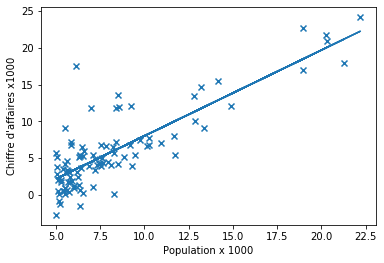

In [165]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

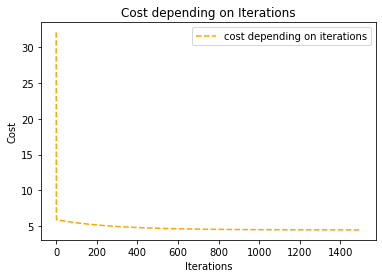

In [166]:
# Cost depending on iterations.
iter = np.array([i for i in range(0,1500)])
plt.plot(iter, costs[:,2], linestyle='--',color='orange', label='cost depending on iterations')
plt.title('Cost depending on Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')


Traçage du coût en fonction de theta0 et theta1

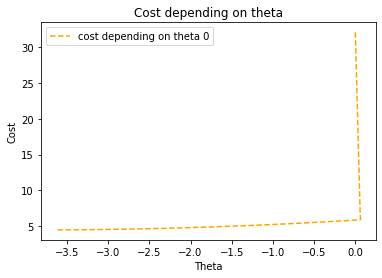

In [167]:
# Cost depending on theta 0.
plt.plot(costs[:,0], costs[:,2], linestyle='--',color='orange', label='cost depending on theta 0')
plt.title('Cost depending on theta')
plt.xlabel('Theta')
plt.ylabel('Cost')
plt.legend(loc='best')

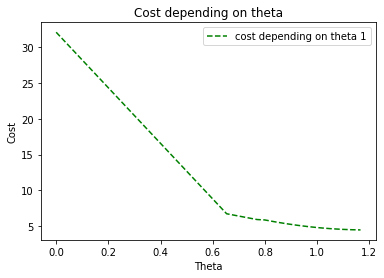

In [168]:
# Cost depending on theta 1
plt.plot(costs[:,1], costs[:,2], linestyle='--',color='green', label='cost depending on theta 1')
plt.title('Cost depending on theta')
plt.xlabel('Theta')
plt.ylabel('Cost')
plt.legend(loc='best')

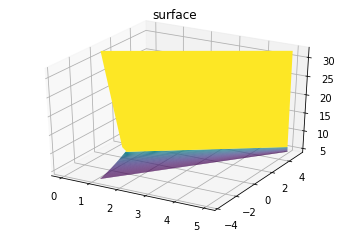

In [169]:
# Cost depending on theta0 and theta 1 ( 3D plot I don't know if it's correct or not ).
ax = plt.axes(projection='3d')
d2 = np.ones(costs.shape[0]) * 5
x1 = np.column_stack((costs[:,1],d2))
x2 = np.column_stack((costs[:,0],d2))
x3 = np.column_stack((costs[:,2],costs[:,2]))
ax.plot_surface(x1, x2, x3, rstride=20, cstride=20,cmap='viridis')
ax.set_title('surface');

Prédire des valeurs de x

In [170]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.45197679])

In [171]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.53424501])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [172]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [173]:
# d'abord créer X et y
intercept1=np.ones((dataMulti.shape[0],1))
X2=np.column_stack((intercept1,dataMulti[:,0],dataMulti[:,1]))
y2 = dataMulti[:, 2];

In [174]:
# We do not have to rewrite the computeCost function it works for all data sets.


Mise à l'échelle des données

In [175]:
# Data standardization : Xstand = (X - mean(X))/standard deviation(X)
def standardize(inputData):
    standardizedData = (inputData - np.mean(inputData)) / np.std(inputData)
    return standardizedData

standardizedData = np.column_stack((intercept1, standardize(X2[:,1]), standardize(X2[:,2])))
print(standardizedData)

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

Normalisation des données en moyenne = 0

In [176]:
# Data normalization : Xnorm = (X - min(X)) / (max(X)-min(X))
def normalize(inputData):
    normalizedData = (inputData - np.min(inputData)) / (np.max(inputData) - np.min(inputData))
    return normalizedData
normalizedData = np.column_stack((intercept1, normalize(X2[:,1]), normalize(X2[:,2])))
print(normalizedData)

[[1.         0.34528406 0.5       ]
 [1.         0.20628792 0.5       ]
 [1.         0.42691671 0.5       ]
 [1.         0.1555433  0.25      ]
 [1.         0.59238831 0.75      ]
 [1.         0.31246553 0.75      ]
 [1.         0.18808605 0.5       ]
 [1.         0.15857694 0.5       ]
 [1.         0.145615   0.5       ]
 [1.         0.17705461 0.5       ]
 [1.         0.30005516 0.75      ]
 [1.         0.31660232 0.5       ]
 [1.         0.28626586 0.5       ]
 [1.         1.         1.        ]
 [1.         0.11472697 0.5       ]
 [1.         0.39933811 0.75      ]
 [1.         0.12906784 0.25      ]
 [1.         0.10590182 0.5       ]
 [1.         0.48455598 0.75      ]
 [1.         0.60093767 0.75      ]
 [1.         0.25234418 0.5       ]
 [1.         0.28571429 0.25      ]
 [1.         0.20739106 0.5       ]
 [1.         0.30612245 0.75      ]
 [1.         0.83783784 0.5       ]
 [1.         0.06839493 0.5       ]
 [1.         0.16712631 0.5       ]
 [1.         0.46166575 0.5 

Appliquer la descente du gradient à plusieurs variables

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [177]:
# bonne chance